## Review of Linear Algebra

This notebook contains some simple examples applying Numpy to simple linear algebra problems includeing eigendecomposition. 

### Example for simple 2x2 matrix

In [1]:
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from itertools import combinations
%matplotlib inline

## Create a small array  
A = np.array([[1,3], [3, 1]])
A

array([[1, 3],
       [3, 1]])

In [2]:
## Eigendecomposition
eigs, Q = np.linalg.eig(A)
Q = Q[[1,0],:]
Q_transpose = np.copy(Q)
Q = np.transpose(Q)
Eigs = np.diag(eigs)
print(Eigs)
print(Q)

[[ 4.  0.]
 [ 0. -2.]]
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


In [3]:
## Check that Q is unitary and orthogonal   
print('Euclidean norm of rows of Q')
print(np.linalg.norm(Q, axis=1)) 
print('\nEuclidean norm of columns of Q')
print(np.linalg.norm(Q, axis=0))

Euclidean norm of rows of Q
[1. 1.]

Euclidean norm of columns of Q
[1. 1.]


In [4]:
## Check that Q orthogonal   
combs = combinations(range(Q.shape[0]), 2)
print('Any non-orthogonal rows? ' + str(np.any([np.dot(Q[i,:],Q[j,:]) for i, j in combs])))
print('Any non-orthogonal columns? ' + str(np.any([np.dot(Q[:,i],Q[:,j]) for i, j in combs])))

Any non-orthogonal rows? False
Any non-orthogonal columns? False


In [5]:
## Reconstruct the matrix from eigendecomponsition 
np.dot(Q, np.dot(Eigs,Q_transpose))

array([[1., 3.],
       [3., 1.]])

In [6]:
## Compute the conditon number
Cond_num = abs(eigs[0]/eigs[1])
Cond_num

1.999999999999999

In [7]:
## Find the inverse
Eigs_inv = np.diag(np.divide(1,eigs))
print(Eigs_inv)
A_inv = np.dot(Q_transpose, np.dot(Eigs_inv, Q))
A_inv

[[ 0.25  0.  ]
 [ 0.   -0.5 ]]


array([[-0.125,  0.375],
       [ 0.375, -0.125]])

In [8]:
print(np.dot(A,A_inv))

[[1.00000000e+00 1.11022302e-16]
 [4.44089210e-16 1.00000000e+00]]


### Eigenvalues and Rank

In [9]:
## Create a new array  
B = np.array([[3,-3,6],
            [2,-2,4],
            [1, -1, 2]])
print(B)

[[ 3 -3  6]
 [ 2 -2  4]
 [ 1 -1  2]]


In [10]:
## Eigenvalues near 0
B_eigs, B_Q = np.linalg.eig(B)
B_Eigs = np.diag(B_eigs)

print(B_Eigs)
print('\n')
B_Q = B_Q[[2,1,0],:]
B_Q_transpose = np.copy(B_Q)
B_Q = np.transpose(B_Q)
print(B_Q)

[[ 3.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  5.23364153e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -6.00567308e-17]]


[[ 2.67261242e-01  5.34522484e-01  8.01783726e-01]
 [-4.47213595e-01 -8.94427191e-01  1.03168406e-16]
 [ 5.20693243e-01  2.15213587e-01 -8.26172899e-01]]


In [11]:
## Large condition number   
Cond_num = abs(np.max(B_eigs)/np.min(B_eigs))
print('{0:4.3E}'.format(Cond_num))

4.995E+16


In [12]:
## Cannot reconstruct matrix
np.dot(B_Q, np.dot(B_Eigs, B_Q_transpose))

array([[ 0.21428571, -0.35856858,  0.41748337],
       [-0.35856858,  0.6       , -0.69858329],
       [ 0.41748337, -0.69858329,  0.81336436]])

In [13]:
## Inverse is not stable
inv_B_eigs = np.diag(np.divide(1,B_eigs))
print('The inverse eigenvalues')
print(inv_B_eigs)
print('\n')
print('The inverse is ill-posed with very large values')
inv_B = np.dot(B_Q_transpose,(np.dot(inv_B_eigs, B_Q)))
print(inv_B)

print('\nProduct of inverse by covariance')
print(np.dot(inv_B, B))

The inverse eigenvalues
[[ 3.33333333e-01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.91071550e+15  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.66509230e+16]]


The inverse is ill-posed with very large values
[[-4.13227934e+15 -1.10162056e+15  7.16293811e+15]
 [-1.10162056e+15  7.57353468e+14  2.96059460e+15]
 [ 7.16293811e+15  2.96059460e+15 -1.13652816e+16]]

Product of inverse by covariance
[[-7.43714103e+15  7.43714103e+15 -1.48742821e+16]
 [ 1.17043984e+15 -1.17043984e+15  2.34087968e+15]
 [ 1.60447219e+16 -1.60447219e+16  3.20894438e+16]]


### Example with Data

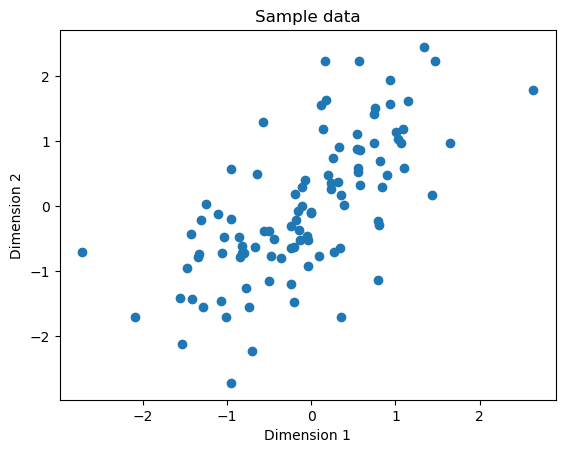

In [14]:
nr.seed(124)
cov = np.array([[1.0, 0.6], [0.6, 1.0]])
mean = np.array([0.0, 0.0])

sample = nr.multivariate_normal(mean, cov, 100)

plt.scatter(sample[:,0], sample[:,1]);
plt.xlabel('Dimension 1');
plt.ylabel('Dimension 2');
plt.title('Sample data');

In [15]:
## Compute the covariance 
cov_sample = 0.5 * np.dot(np.transpose(sample), sample)
cov_sample

array([[40.504917  , 32.86396054],
       [32.86396054, 58.31290287]])

In [16]:
## Eigendecomposition of covariance  
sample_eigs, sample_Q = np.linalg.eig(cov_sample)
Sample_Eigs = np.diag(sample_eigs)
print(Sample_Eigs)
print('\n')
Q = Q[[1,0],:]
sample_Q_transpose = np.copy(sample_Q)
sample_Q = np.transpose(sample_Q)
print(sample_Q)
print('\nThe condition number = {0:6.3}'.format(np.max(sample_eigs)/np.min(sample_eigs)))

[[15.36010683  0.        ]
 [ 0.         83.45771303]]


[[-0.79419984  0.60765665]
 [-0.60765665 -0.79419984]]

The condition number =   5.43


In [17]:
## Reconstruct the covariance matrix   
np.dot(sample_Q, np.dot(Sample_Eigs, sample_Q_transpose))

array([[ 40.504917  , -32.86396054],
       [-32.86396054,  58.31290287]])

In [18]:
## Find and test the inverse   
Inv_Sample_Eigs = np.linalg.inv(Sample_Eigs)
print(Inv_Sample_Eigs)
print('\nInverse Convariance matrix')
inv_covariance = np.dot(sample_Q_transpose,(np.dot(Inv_Sample_Eigs, sample_Q)))
print(inv_covariance)
print('\nProduct of inverse and covariance matrix')
print(np.dot(inv_covariance, cov_sample))

[[0.06510371 0.        ]
 [0.         0.01198212]]

Inverse Convariance matrix
[[ 0.04548874 -0.02563653]
 [-0.02563653  0.03159709]]

Product of inverse and covariance matrix
[[1. 0.]
 [0. 1.]]


## Example: Increase linear dependency of variables

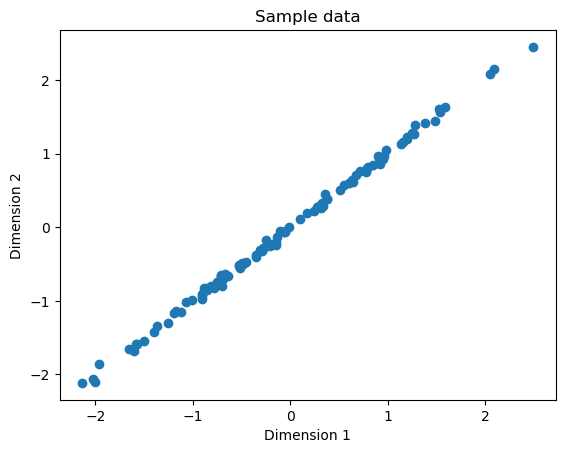

In [19]:
## Increase colinearity of variables 
nr.seed(124)
cov = np.array([[1.0, 0.999], [0.999, 1.0]])
mean = np.array([0.0, 0.0])

sample2 = nr.multivariate_normal(mean, cov, 100)

plt.scatter(sample2[:,0], sample2[:,1]);
plt.xlabel('Dimension 1');
plt.ylabel('Dimension 2');
plt.title('Sample data');

In [20]:
## Compute covariance and eigendecompositon   
cov_sample2 = np.dot(np.transpose(sample2), sample2)/sample2.shape[1]
print(cov_sample2)
print('\n')
sample2_eigs, sample2_Q = np.linalg.eig(cov_sample2)
Sample2_Eigs = np.diag(sample2_eigs)
print(Sample2_Eigs)
print('\n')
Q = Q[[1,0],:]
sample2_Q_transpose = np.copy(sample2_Q)
sample2_Q = np.transpose(sample2_Q)
print(sample2_Q)
print('\nThe condition number = {0:6.3}'.format(np.max(sample2_eigs)/np.min(sample2_eigs)))

[[50.91789107 51.37415259]
 [51.37415259 51.91313884]]


[[3.89523705e-02 0.00000000e+00]
 [0.00000000e+00 1.02792078e+02]]


[[-0.71052298  0.703674  ]
 [-0.703674   -0.71052298]]

The condition number = 2.64e+03


In [21]:
## Find and test the inverse   
inv_B_eigs2 = np.linalg.inv(Sample2_Eigs)
print('The inverse eigenvalues')
print(inv_B_eigs2)
print('\nInverse Convariance matrix')
inv_covariance2 = np.dot(sample2_Q_transpose,(np.dot(inv_B_eigs2, sample2_Q)))
print(inv_covariance2)
print('\nProduct of inverse and covariance matrix')
print(np.dot(inv_covariance2, cov_sample2))

The inverse eigenvalues
[[2.56723785e+01 0.00000000e+00]
 [0.00000000e+00 9.72837619e-03]]

Inverse Convariance matrix
[[ 12.9653353  -12.83072318]
 [-12.83072318  12.71677161]]

Product of inverse and covariance matrix
[[ 1.00000000e+00 -1.13686838e-13]
 [ 1.13686838e-13  1.00000000e+00]]


## Example: Higher dimensions with increased colinarity 

In [ ]:
## create an array with 4 nearly colinear columns 
n_rows = len(sample2)
n_cols = 8
cov_large=0.99999999
nr.seed(1234)
cov3 = np.full((n_cols,n_cols), cov_large) 
diags = [1.0]*n_cols
for i in range(n_cols):
    cov3[i,i] = diags[i]
mean = np.array([0.0] * n_cols)

sample3 = nr.multivariate_normal(mean, cov3, n_rows)

print(sample3[:10])

In [ ]:
## Compute the covariance matrix   
cov_sample3 = np.dot(np.transpose(sample3), sample3)/sample3.shape[1]
print(cov_sample3)

In [ ]:
## Compute and display the eigen decomposition 
sample3_eigs, sample3_Q = np.linalg.eig(cov_sample3)
print('The eigenvalues')
print(sample3_eigs)
print('\n')
print(sample3_Q)
print('\nThe condition number = {0:6.3}'.format(np.max(sample3_eigs)/np.min(sample3_eigs)))

In [ ]:
## Find and test the inverse   
inv_eigs3 = np.linalg.inv(np.diag(sample3_eigs))
print('The inverse eigenvalues')
print(inv_eigs3)
print('\nInverse Convariance matrix')
inv_covariance3 = np.dot(sample3_Q,(np.dot(inv_eigs3, np.transpose(sample3_Q))))
print(inv_covariance3)
print('\nProduct of inverse and covariance matrix')
print(np.dot(inv_covariance3, cov_sample3))

## Singlular Value Decomposition (SVD)  

In [ ]:
## SVD decomposition of sample  
U, S, V = np.linalg.svd(sample2)
U = U[:,:2]
print('U')
print(U)
print('Dimensions of U = ' + str(U.shape))
print('\nS')
print(np.diag(S))
print('\nV')
print(V)

In [ ]:
## How good is the reconstruction? 
sample2_reconstructed = np.dot(U, np.dot(np.diag(S), V))
print("Dimensions of reconstruction = " + str(sample2_reconstructed.shape))
print("Norm of difference with reconstructed matrix = " + str(np.linalg.norm(sample2 - sample2_reconstructed)))

In [ ]:
## Test inverse of decompostion
S_inverse = np.diag([1/s for s in S])
sample2_svd_inverse = np.dot(V, np.dot(S_inverse, np.transpose(U)))
np.dot(sample2_svd_inverse, sample2)